In [1]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math

In [2]:
def read_csv(path):
    rows = []
    with open(path) as file:
        reader = csv.reader(file)
        for row in reader:
            rows.append(row)
    return rows

In [3]:
def list_range(low, high_exclusive, increment = 1):
    arr = []
    for x in range(low, high_exclusive, increment):
        arr.append(x)
    return arr

In [4]:
def average_list(lst):
    if len(lst) > 0:
        return sum(lst) / len(lst)
    else:
        return 0

In [5]:
def bucket(rows, bucket_by_row_index, increment, row_index_for_value_added_to_bucket):
    data = [[]]
    rows = sorted(rows[1:], key=lambda x: int(x[bucket_by_row_index]))
    bucket_number = 0
    for row in rows[1:]:
        rank = int(row[bucket_by_row_index])
        if (rank < 1):
            continue
        while (rank > (bucket_number+1) * increment):
            bucket_number += 1
            data.append([])
        data[bucket_number].append(int(row[row_index_for_value_added_to_bucket]))
    return data

In [6]:
def bucketLength(rows, bucket_by_row_index, increment, row_index_for_value_added_to_bucket, min_sort_value, max_sort_value):
    data = [[]]
    rows = sorted(rows[1:], key=lambda x: int(x[bucket_by_row_index]))
    bucket_number = 0
    for row in rows[1:]:
        rank = int(row[bucket_by_row_index])
        if (rank < min_sort_value or rank > max_sort_value):
            continue
        while (rank > (bucket_number+1) * increment):
            bucket_number += 1
            data.append([])
        data[bucket_number].append(int(row[row_index_for_value_added_to_bucket]))
    return data

In [7]:
def average_list_of_lists(list_of_lists):
    new_list = []
    for lst in list_of_lists:
        new_list.append(average_list(lst))
    return new_list

In [8]:
def create_boxplot(x_labels, data, x_axix_label = "", y_axis_label = "", title = ""):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = plt.boxplot(data)
    plt.xticks(list_range(0, len(x_labels)), x_labels)
    ax.set_title(title)
    ax.set_xlabel(x_axix_label)
    ax.set_ylabel(y_axis_label)
    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")
    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                color ='#e7298a',
                alpha = 0.5)
    plt.show()

In [9]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/Downloads/res_new"
increment = 50 # ['rank', 'visits', 'instructions', 'page faults', 'cache references', 'cache misses', 'branches', 'branch misses', 'microseconds']
row_index_rank = 0
row_index_visits = 1
row_index_instructions = 2
row_index_cache_references = 4
row_index_cache_misses = 5
row_index_branch_misses = 7
row_index_time = 8

filename_prefix = "/maltacompare"
filename_postfix = ".txt"
variants = ["Dijkstra", "BidirectionalDijkstra", "BidirectionalAStar", "BidirectionalLandmarks", "AStar", "Landmarks", "ReachWithAStar", "ReachWithLandmarks", "ContractionHierarchiesEDS5"]

malta_rank_visits = []
malta_rank_instructions = []
malta_rank_cache_references = []
malta_rank_cache_misses = []
malta_rank_branch_misses = []
malta_rank_times = []

max_x_ticks = 25

for variant in variants:
    path = folder_path + filename_prefix + variant + filename_postfix
    csv_rows = read_csv(path)
    
    bucketed_visits = bucket(csv_rows, row_index_rank, increment, row_index_visits)
    average_visits = average_list_of_lists(bucketed_visits)
    
    list_max_length = len(average_visits) if len(average_visits) <= max_x_ticks else max_x_ticks
    x = list_range(increment, (len(average_visits)+1)*increment, increment)[:list_max_length]
    y = average_visits[:list_max_length]
    malta_rank_visits.append([x,y, variant])
    
    bucketed_instructions = bucket(csv_rows, row_index_rank, increment, row_index_instructions)
    average_instructions = average_list_of_lists(bucketed_instructions)
    y = average_instructions[:list_max_length]
    malta_rank_instructions.append([x,y, variant])
    
    bucketed_cache_references = bucket(csv_rows, row_index_rank, increment, row_index_cache_references)
    average_cache_references = average_list_of_lists(bucketed_cache_references)
    y = average_cache_references[:list_max_length]
    malta_rank_cache_references.append([x,y, variant])
    
    bucketed_cache_misses = bucket(csv_rows, row_index_rank, increment, row_index_cache_misses)
    average_cache_misses = average_list_of_lists(bucketed_cache_misses)
    y = average_cache_misses[:list_max_length]
    malta_rank_cache_misses.append([x,y, variant])
    
    bucketed_branch_misses = bucket(csv_rows, row_index_rank, increment, row_index_branch_misses)
    average_branch_misses = average_list_of_lists(bucketed_branch_misses)
    y = average_branch_misses[:list_max_length]
    malta_rank_branch_misses.append([x,y, variant])
    
    bucketed_time = bucket(csv_rows, row_index_rank, increment, row_index_time)
    average_time = average_list_of_lists(bucketed_time)
    y = average_time[:list_max_length]
    malta_rank_times.append([x,y, variant])
    

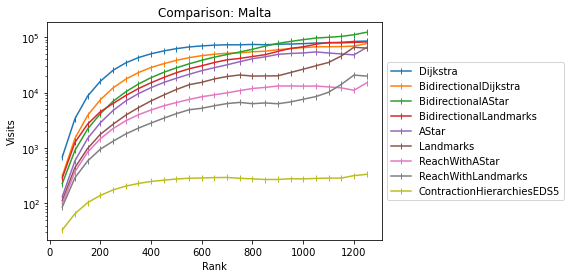

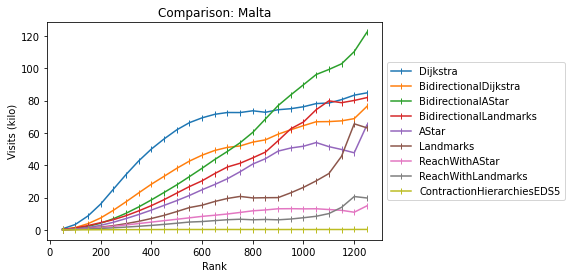

In [12]:
for elem in malta_rank_visits:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')


plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Visits')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_visits:
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Visits (kilo)')
plt.title('Comparison: Malta')
# show
plt.show()

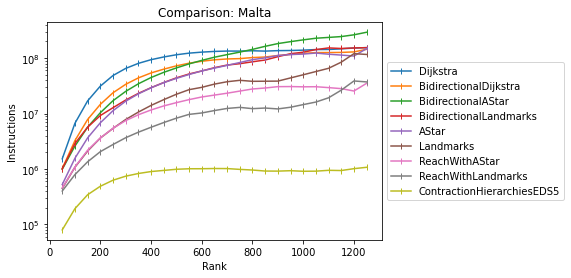

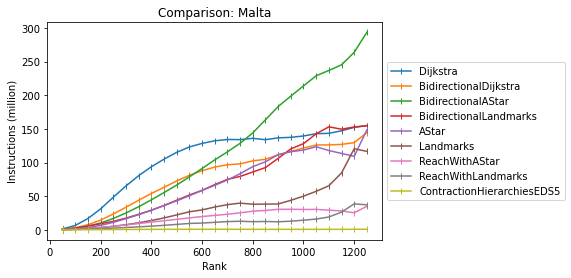

In [73]:
for elem in malta_rank_instructions:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')
    
plt.yscale('log')
    # Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Instructions')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_instructions:
    plt.plot(elem[0], [x/(10**6) for x in elem[1]], label = elem[2], marker='|')
# 10**7 = 1.000.000 = 1 million

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Instructions (million)')
plt.title('Comparison: Malta')
# show
plt.show()

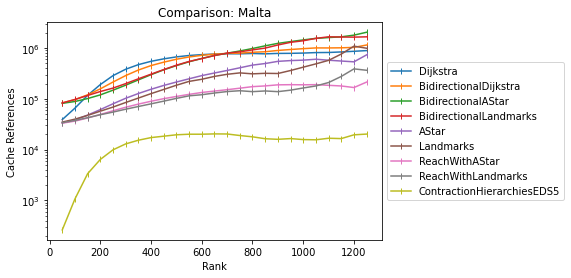

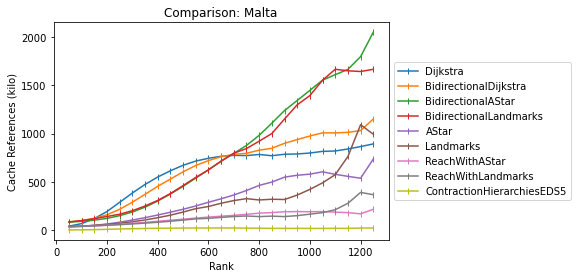

In [74]:
for elem in malta_rank_cache_references:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache References')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_cache_references:
    plt.plot(elem[0], [x/(10**3) for x in elem[1]], label = elem[2], marker='|')
    # 10**3 = 1.000 = kilo
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache References (kilo)')
plt.title('Comparison: Malta')
# show
plt.show()

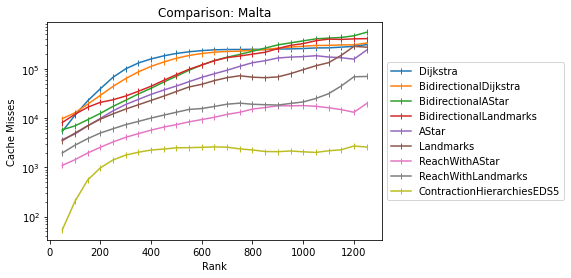

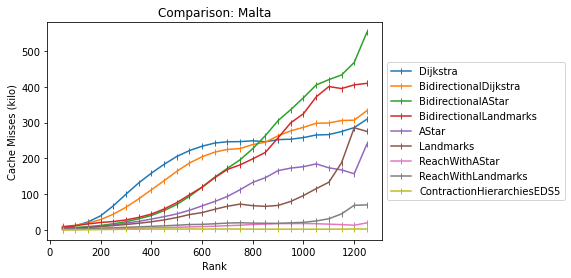

In [75]:
for elem in malta_rank_cache_misses:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache Misses')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_cache_misses:
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache Misses (kilo)')
plt.title('Comparison: Malta')
# show
plt.show()

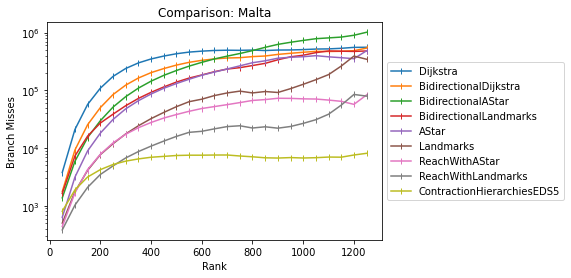

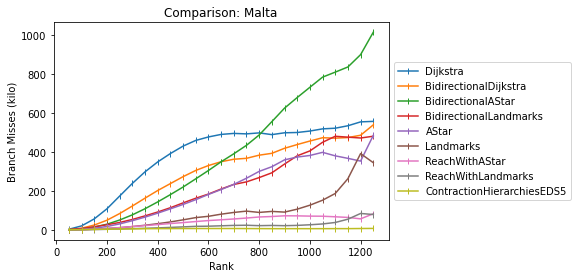

In [76]:
for elem in malta_rank_branch_misses:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')
    
plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Branch Misses')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_branch_misses:
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Branch Misses (kilo)')
plt.title('Comparison: Malta')
# show
plt.show()

No handles with labels found to put in legend.


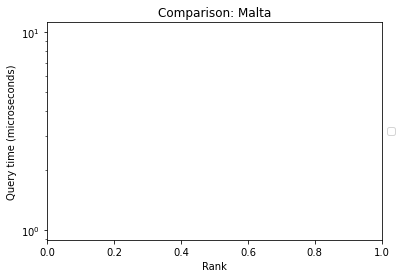

No handles with labels found to put in legend.


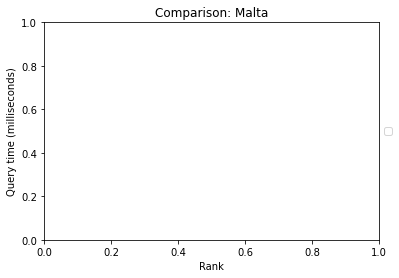

In [97]:
for rank_time in malta_rank_times:
    plt.plot(rank_time[0], rank_time[1], label = rank_time[2], marker='|')
    
plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (microseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_times:
    #if elem[2] == "ReachWithAStar":
    #    continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks":
    #    continue
        
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

In [78]:
average_query_times = []
for elem in malta_rank_times:
    average_query_time = average_list(elem[1])
    average_query_times.append([average_query_time, elem[2]])

for elem in average_query_times:
    print(elem)

[13223.971337231033, 'Dijkstra']
[10673.160371372574, 'BidirectionalDijkstra']
[14789.71090573642, 'BidirectionalAStar']
[9020.271655308596, 'BidirectionalLandmarks']
[8074.286158346683, 'AStar']
[4520.619235963199, 'Landmarks']
[1882.9695696790563, 'ReachWithAStar']
[1393.9794972356758, 'ReachWithLandmarks']
[198.00174842948465, 'ContractionHierarchiesEDS5']


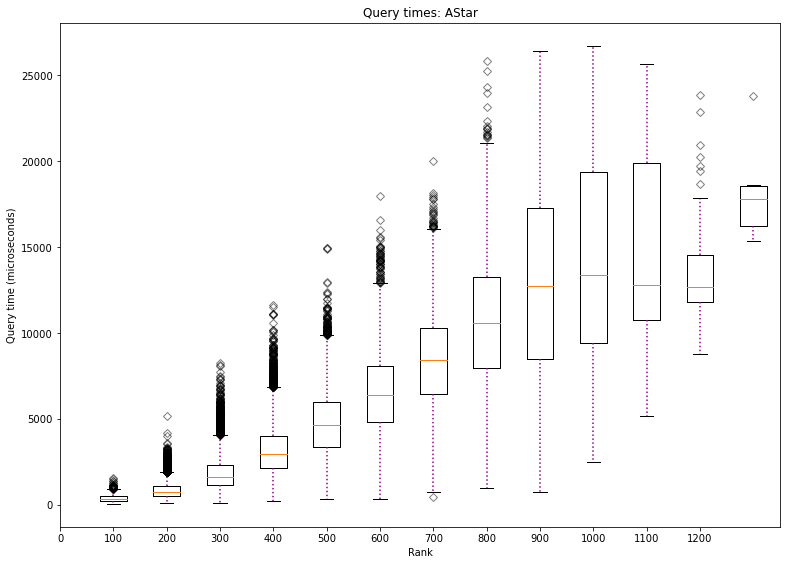

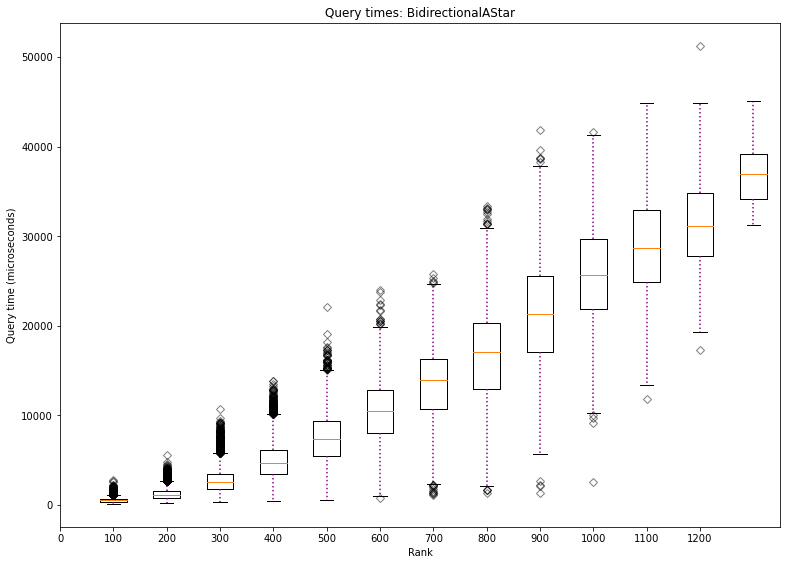

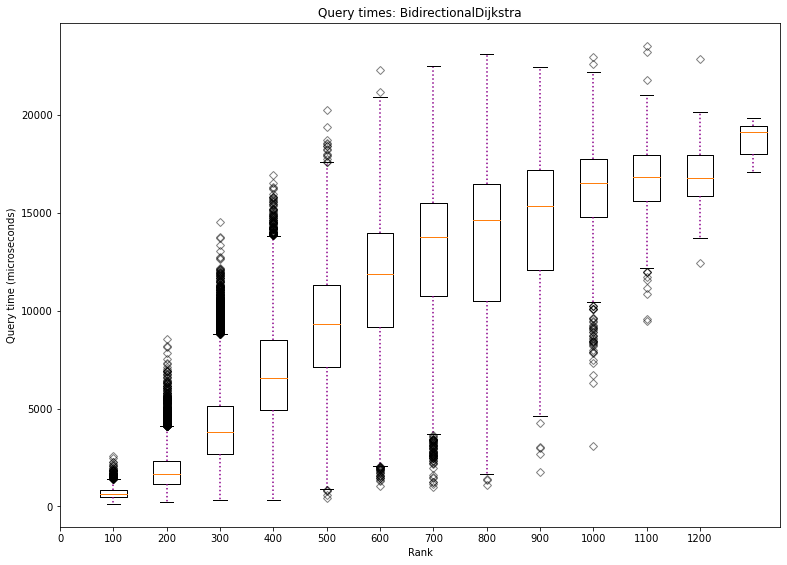

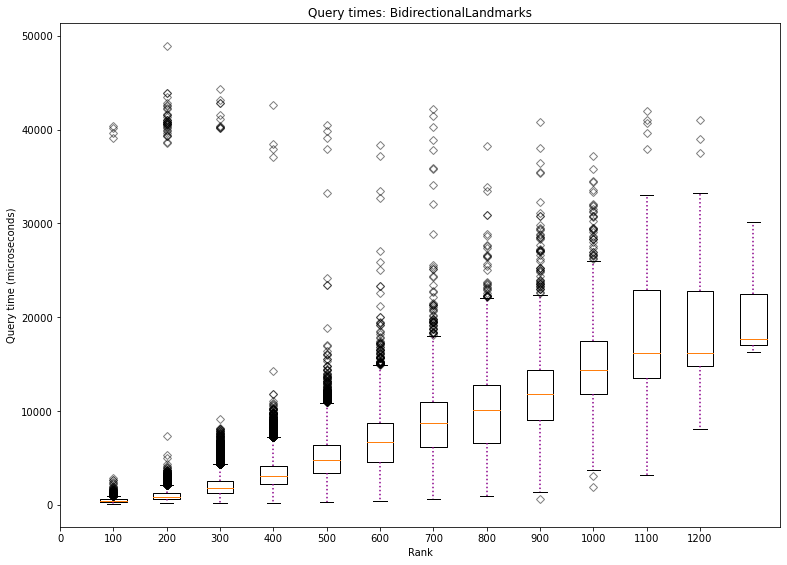

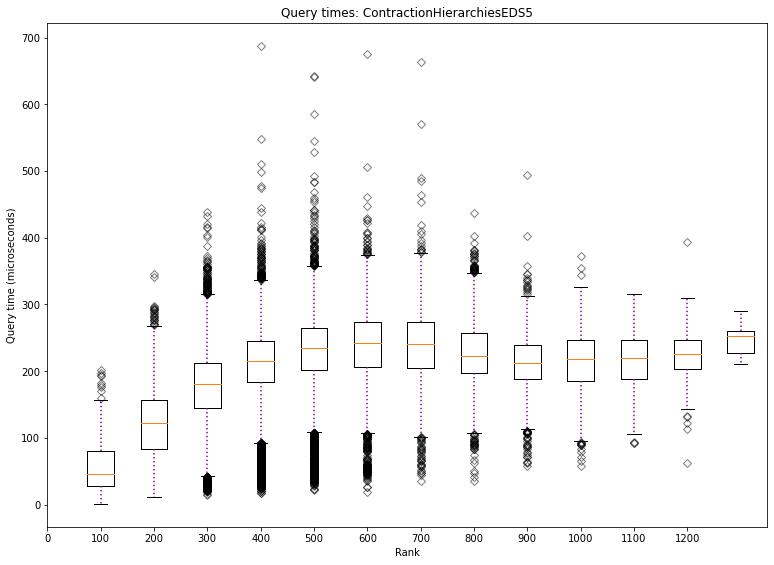

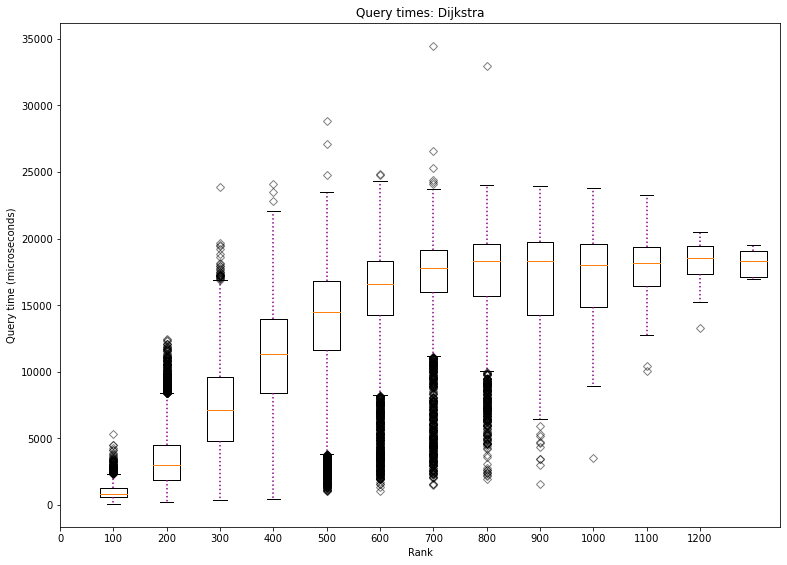

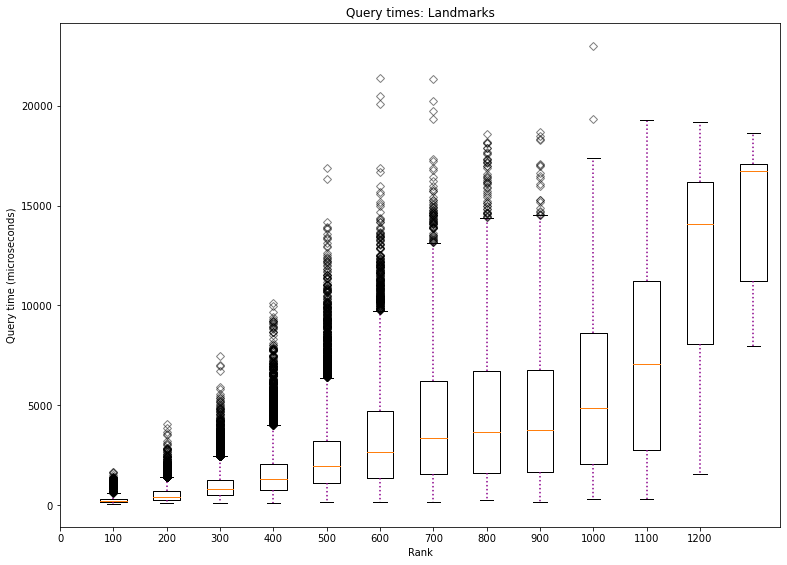

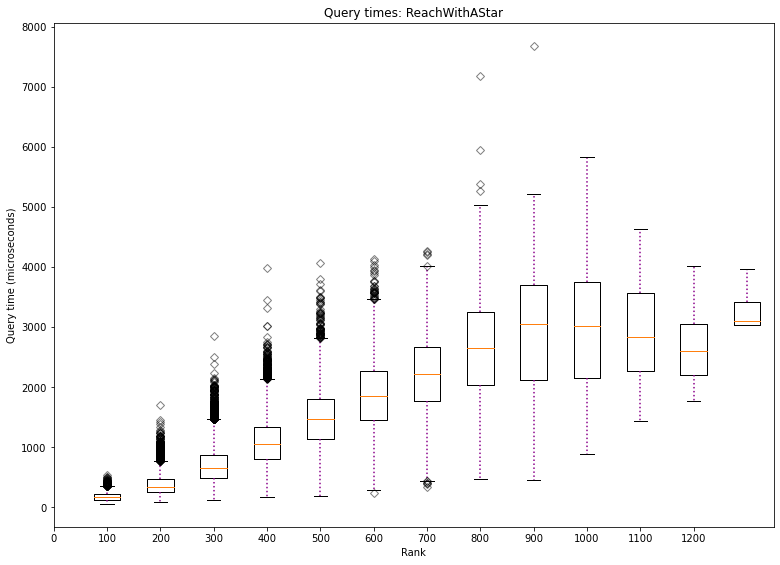

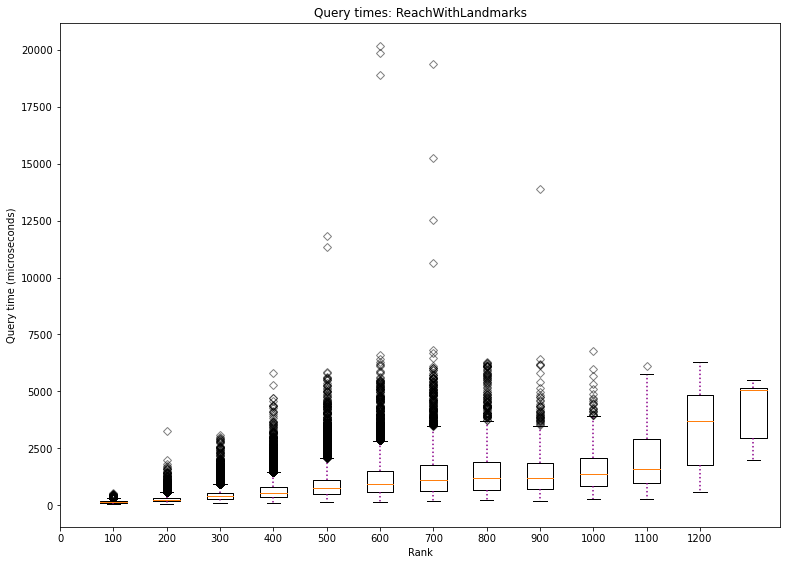

In [79]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/Downloads/res_new"
filename_prefix = "/maltacompare"
filename_postfix = ".txt"
variants = ["AStar", "BidirectionalAStar", "BidirectionalDijkstra", "BidirectionalLandmarks", "ContractionHierarchiesEDS5", "Dijkstra", "Landmarks", "ReachWithAStar", "ReachWithLandmarks"]

def read_data(path, row_index):
    rows = read_csv(path)
    data = bucket(rows, 0, 100, row_index)
    return data

for variant in variants:
    path = folder_path + filename_prefix + variant + filename_postfix
    row_index_time = 8
    data = read_data(path, row_index_time)
    create_boxplot(list_range(0, 100*len(data), 100), data, "Rank", "Query time (microseconds)", "Query times: "+variant)

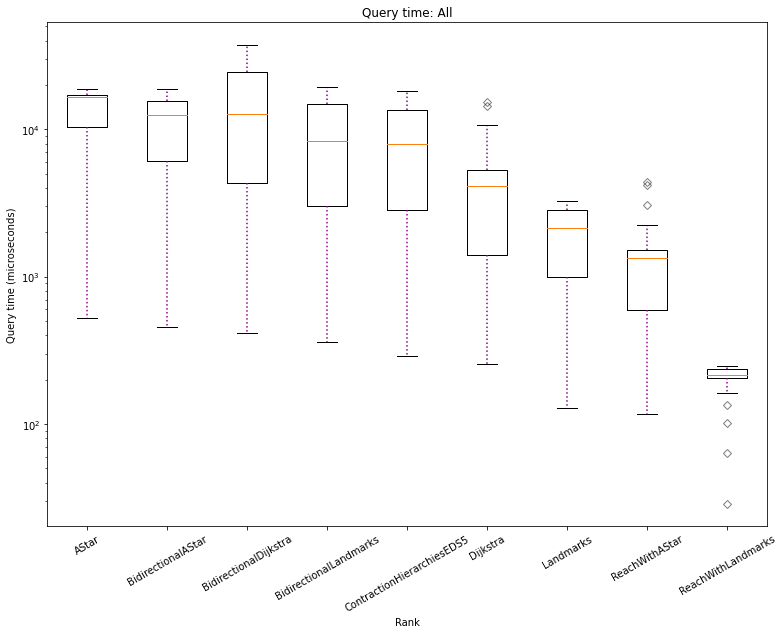

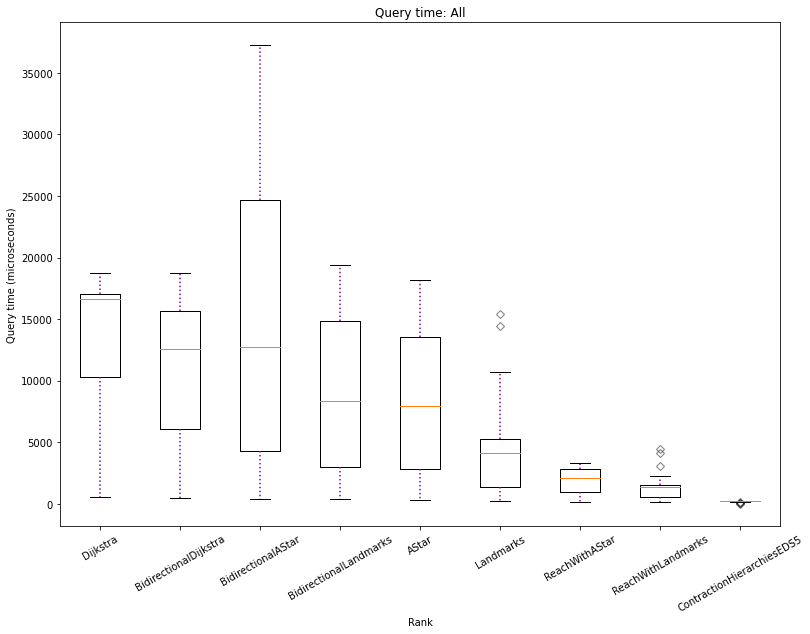

In [80]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
x_labels = variants
x_axix_label = "Rank"
y_axis_label = "Query time (microseconds)"
title = "Query time: All"

data = []
variants = []
for elem in malta_rank_times:
    data.append(elem[1])
    variants.append(elem[2])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = plt.boxplot(data)
plt.xticks(list_range(1, 1+len(x_labels)), x_labels)
ax.set_title(title)
ax.set_xlabel(x_axix_label)
ax.set_ylabel(y_axis_label)
ax.set_yscale('log')
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
            color ='#e7298a',
            alpha = 0.5)
plt.xticks(rotation=30)
plt.show()


x_labels = variants
x_axix_label = "Rank"
y_axis_label = "Query time (microseconds)"
title = "Query time: All"

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = plt.boxplot(data)
plt.xticks(list_range(1, 1+len(x_labels)), x_labels)
ax.set_title(title)
ax.set_xlabel(x_axix_label)
ax.set_ylabel(y_axis_label)
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
            color ='#e7298a',
            alpha = 0.5)
plt.xticks(rotation=30)
plt.show()

In [81]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/Downloads/res_new"
increment = 50
row_index_time = 8
row_index_visits = 1
row_index_instructions = 2
row_index_cache_references = 4

row_index_rank = 0
filename_prefix = "/bornholmcompare"
filename_postfix = ".txt"
variants = ["Dijkstra", "BidirectionalDijkstra", "BidirectionalAStar", "BidirectionalLandmarks", "AStar", "Landmarks", "ReachWithAStar", "ReachWithLandmarks", "ContractionHierarchiesEDS5"]

bornholm_rank_visits = []
bornholm_rank_instructions = []
bornholm_rank_cache_references = []
bornholm_rank_cache_misses = []
bornholm_rank_branch_misses = []
bornholm_rank_times = []

for variant in variants:
    path = folder_path + filename_prefix + variant + filename_postfix
    csv_rows = read_csv(path)
    
    bucketed_visits = bucket(csv_rows, row_index_rank, increment, row_index_visits)
    average_visits = average_list_of_lists(bucketed_visits)
    x = list_range(increment, (len(average_visits)+1)*increment, increment)
    y = average_visits
    bornholm_rank_visits.append([x,y, variant])
    
    bucketed_instructions = bucket(csv_rows, row_index_rank, increment, row_index_instructions)
    average_instructions = average_list_of_lists(bucketed_instructions)
    y = average_instructions
    bornholm_rank_instructions.append([x,y, variant])
    
    bucketed_cache_references = bucket(csv_rows, row_index_rank, increment, row_index_cache_references)
    average_cache_references = average_list_of_lists(bucketed_cache_references)
    y = average_cache_references
    bornholm_rank_cache_references.append([x,y, variant])
    
    bucketed_cache_misses = bucket(csv_rows, row_index_rank, increment, row_index_cache_misses)
    average_cache_misses = average_list_of_lists(bucketed_cache_misses)
    y = average_cache_misses
    bornholm_rank_cache_misses.append([x,y, variant])
    
    bucketed_branch_misses = bucket(csv_rows, row_index_rank, increment, row_index_branch_misses)
    average_branch_misses = average_list_of_lists(bucketed_branch_misses)
    y = average_branch_misses
    bornholm_rank_branch_misses.append([x,y, variant])
    
    bucketed_time = bucket(csv_rows, row_index_rank, increment, row_index_time)
    average_time = average_list_of_lists(bucketed_time)
    y = average_time
    bornholm_rank_times.append([x,y, variant])

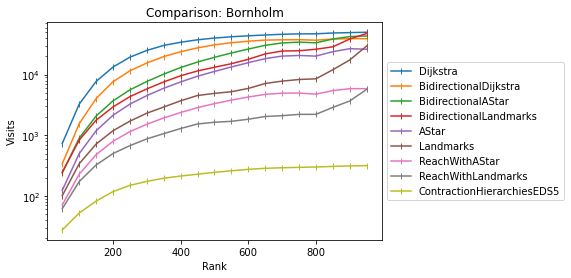

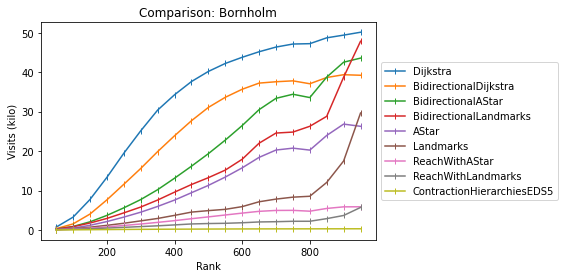

In [83]:
for elem in bornholm_rank_visits:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Visits')
plt.title('Comparison: Bornholm')
# show
plt.show()

for elem in bornholm_rank_visits:
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Visits (kilo)')
plt.title('Comparison: Bornholm')
# show
plt.show()

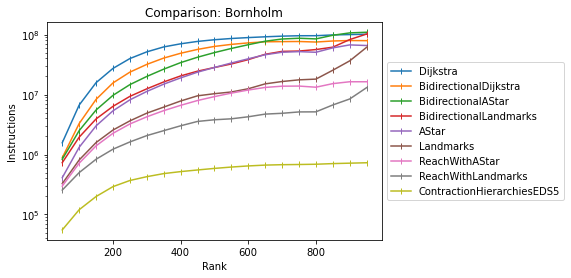

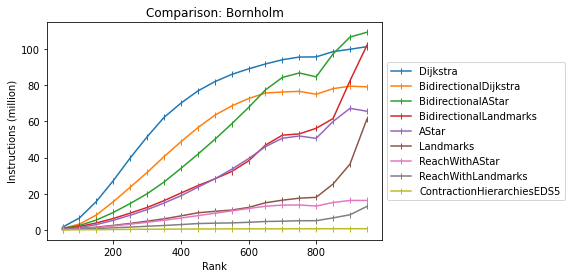

In [84]:
for elem in bornholm_rank_instructions:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')
    
plt.yscale('log')
    # Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Instructions')
plt.title('Comparison: Bornholm')
# show
plt.show()

for elem in bornholm_rank_instructions:
    plt.plot(elem[0], [x/(10**6) for x in elem[1]], label = elem[2], marker='|')
# 10**7 = 1.000.000 = 1 million

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Instructions (million)')
plt.title('Comparison: Bornholm')
# show
plt.show()

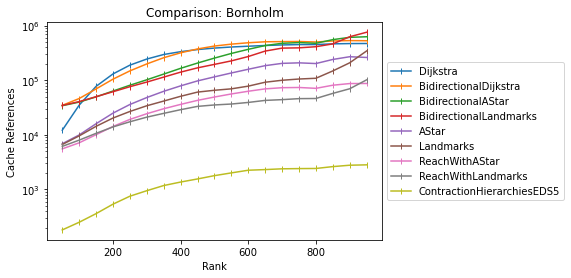

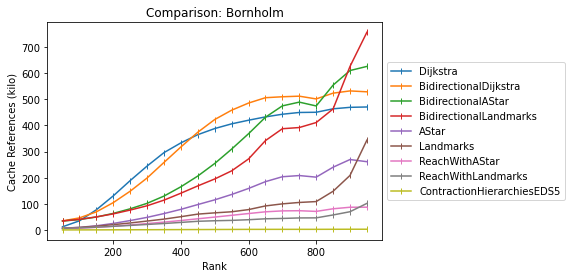

In [85]:
for elem in bornholm_rank_cache_references:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache References')
plt.title('Comparison: Bornholm')
# show
plt.show()

for elem in bornholm_rank_cache_references:
    plt.plot(elem[0], [x/(10**3) for x in elem[1]], label = elem[2], marker='|')
    # 10**3 = 1.000 = kilo
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache References (kilo)')
plt.title('Comparison: Bornholm')
# show
plt.show()

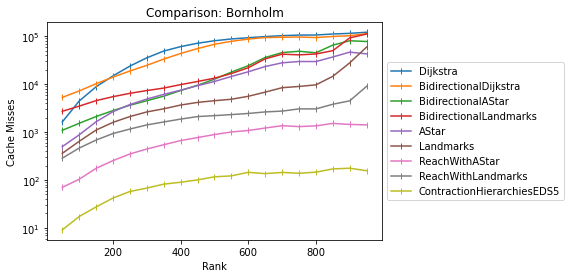

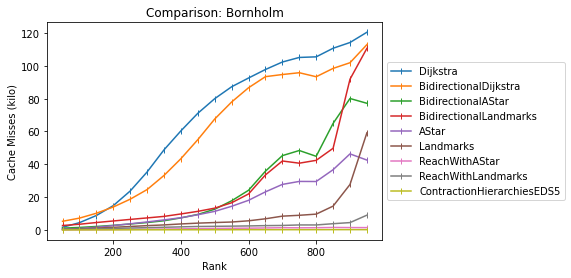

In [86]:
for elem in bornholm_rank_cache_misses:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache Misses')
plt.title('Comparison: Bornholm')
# show
plt.show()

for elem in bornholm_rank_cache_misses:
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Cache Misses (kilo)')
plt.title('Comparison: Bornholm')
# show
plt.show()

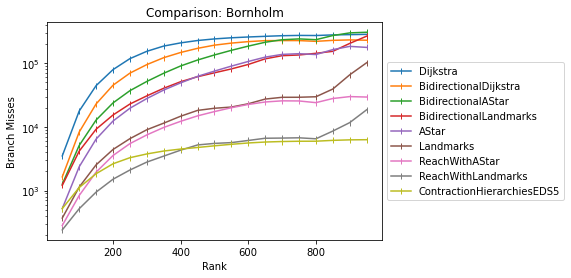

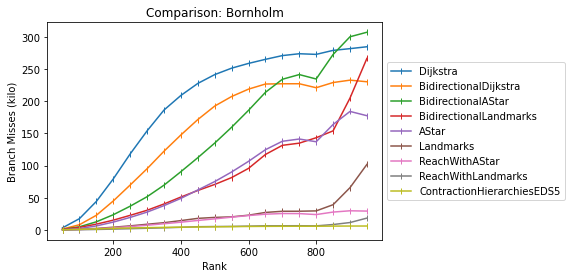

In [87]:
for elem in bornholm_rank_branch_misses:
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')
    
plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Branch Misses')
plt.title('Comparison: Bornholm')
# show
plt.show()

for elem in bornholm_rank_branch_misses:
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Branch Misses (kilo)')
plt.title('Comparison: Bornholm')
# show
plt.show()

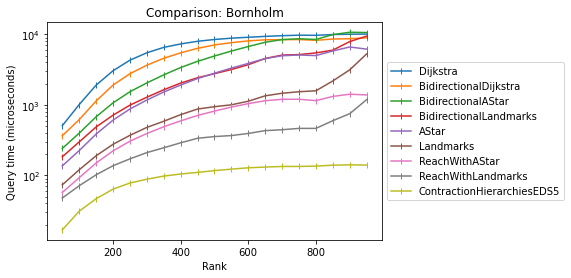

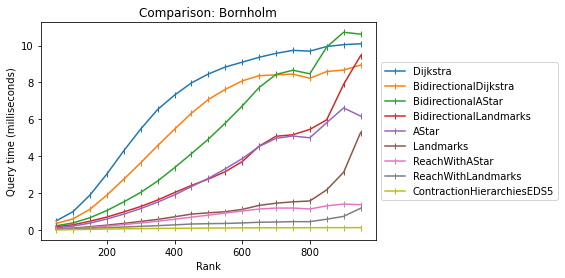

In [88]:
for rank_time in bornholm_rank_times:
    plt.plot(rank_time[0], rank_time[1], label = rank_time[2], marker='|')

plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (microseconds)')
plt.title('Comparison: Bornholm')
# show
plt.show()

for rank_time in bornholm_rank_times:
    plt.plot(rank_time[0], [x/1000 for x in rank_time[1]], label = rank_time[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Comparison: Bornholm')
# show
plt.show()

In [107]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources"
increment = 50 # ['rank', 'visits', 'instructions', 'page faults', 'cache references', 'cache misses', 'branches', 'branch misses', 'microseconds']
row_index_rank = 0
row_index_visits = 1
row_index_time = 2

filename_prefix = "/maltacompare"
filename_postfix = ".txt"
variants = ["Landmarks3", "Landmarks4", "ReachWithAStar", "ReachWithLandmarks3", "ReachWithLandmarks4", "ReachWithLandmarks_Fast_Vector_3", "ReachWithLandmarks_Fast_Vector_4", "ContractionHierarchiesEDS5"]

malta_rank_visits = []
malta_rank_times = []

max_x_ticks = 22225




for variant in variants:
    path = folder_path + filename_prefix + variant + filename_postfix
    csv_rows = read_csv(path)
    
    bucketed_visits = bucket(csv_rows, row_index_rank, increment, row_index_visits)
    average_visits = average_list_of_lists(bucketed_visits)
    
    list_max_length = len(average_visits) if len(average_visits) <= max_x_ticks else max_x_ticks
    x = list_range(increment, (len(average_visits)+1)*increment, increment)[:list_max_length]
    y = average_visits[:list_max_length]
    malta_rank_visits.append([x,y, variant])
    
    bucketed_time = bucket(csv_rows, row_index_rank, increment, row_index_time)
    average_time = average_list_of_lists(bucketed_time)
    y = average_time[:list_max_length]
    malta_rank_times.append([x,y, variant])

In [45]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources"
increment = 1000 # ['rank', 'visits', 'instructions', 'page faults', 'cache references', 'cache misses', 'branches', 'branch misses', 'microseconds']
row_index_rank = 0
row_index_visits = 1
row_index_time = 2
row_index_path_length = 3

filename_prefix = "/maltacompare"
filename_postfix = ".txt"
variants = ["Landmarks3", "Landmarks4", "ReachWithAStar", "ReachWithLandmarks3", "ReachWithLandmarks4", "ReachWithLandmarks_Fast_Vector_3", "ReachWithLandmarks_Fast_Vector_4", "ContractionHierarchiesEDS5"]

malta_length_visits = []
malta_length_times = []
malta_rank_visits = []
malta_rank_times = []

path = folder_path + filename_prefix + "ReachWithLandmarksContainsDistances" + filename_postfix
csv_rows_path_length = read_csv(path)
path_lengths = []
for row in csv_rows_path_length:
    path_length = row[row_index_path_length]
    path_lengths.append(path_length)

for variant in variants:
    path = folder_path + filename_prefix + variant + filename_postfix
    csv_rows = read_csv(path)
    for i in range(len(csv_rows)):
        csv_rows[i].append(path_lengths[i])
    
    
    bucketed_visits = bucketLength(csv_rows, row_index_path_length, increment, row_index_visits, 1, 900000)
    average_visits = average_list_of_lists(bucketed_visits)
    
    list_max_length = len(average_visits) if len(average_visits) <= max_x_ticks else max_x_ticks
    x = list_range(increment, (len(average_visits)+1)*increment, increment)[:list_max_length]
    y = average_visits[:list_max_length]
    malta_length_visits.append([x,y, variant])
    
    bucketed_time = bucketLength(csv_rows, row_index_path_length, increment, row_index_time, 1, 900000)
    average_time = average_list_of_lists(bucketed_time)
    y = average_time[:list_max_length]
    malta_length_times.append([x,y, variant])

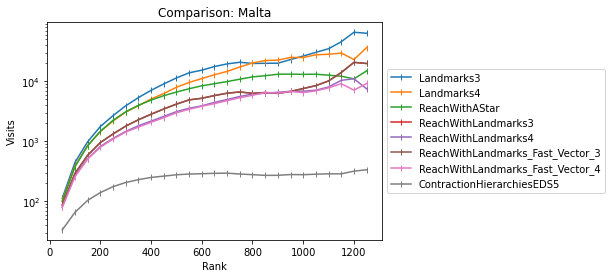

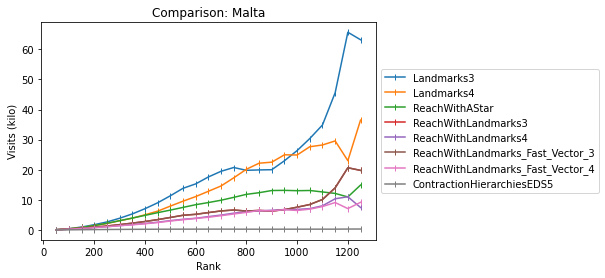

In [38]:
for elem in malta_rank_visits:
    #if elem[2] == "ReachWithAStar":
    #    continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks3":
    #    continue
    #if elem[2] == "Landmarks4":
    #    continue
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')


plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Visits')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_visits:
    #if elem[2] == "ReachWithAStar":
    #    continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks3":
    #    continue
    #if elem[2] == "Landmarks4":
    #    continue
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Visits (kilo)')
plt.title('Comparison: Malta')
# show
plt.show()

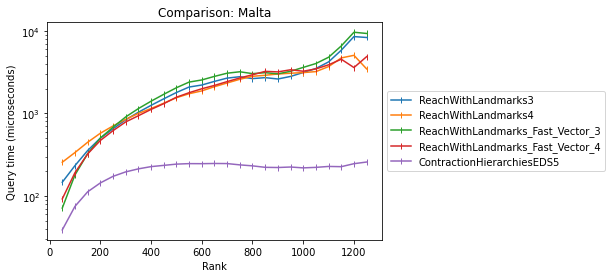

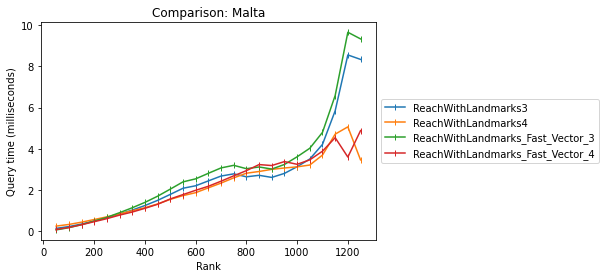

In [109]:
for elem in malta_rank_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    if elem[2] == "Landmarks3":
        continue
    if elem[2] == "Landmarks4":
        continue
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')
    
plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (microseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    if elem[2] == "ContractionHierarchiesEDS5":
        continue
    if elem[2] == "Landmarks3":
        continue
    if elem[2] == "Landmarks4":
        continue
        
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

No handles with labels found to put in legend.


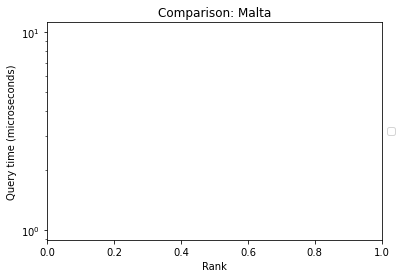

No handles with labels found to put in legend.


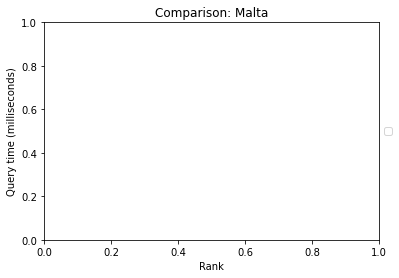

In [106]:
# Combined
for elem in malta_rank_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks3":
    #    continue
    #if elem[2] == "Landmarks4":
    #    continue
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

    
plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (microseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_rank_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    if elem[2] == "Landmarks3":
        continue
    if elem[2] == "Landmarks4":
        continue
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')

    
    
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

In [103]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources"
increment = 1000 # ['rank', 'visits', 'instructions', 'page faults', 'cache references', 'cache misses', 'branches', 'branch misses', 'microseconds']
row_index_rank = 0
row_index_visits = 1
row_index_time = 2
row_index_path_length = 3

filename_prefix = "/maltacompare"
filename_postfix = ".txt"
variants = ["Landmarks3", "Landmarks4", "ReachWithAStar", "ReachWithLandmarks3", "ReachWithLandmarks4", "ReachWithLandmarks_Fast_Vector_3", "ReachWithLandmarks_Fast_Vector_4", "ContractionHierarchiesEDS5"]

malta_length_visits = []
malta_length_times = []
malta_rank_visits = []
malta_rank_times = []

path = folder_path + filename_prefix + "ReachWithLandmarksContainsDistances" + filename_postfix
csv_rows_path_length = read_csv(path)
path_lengths = []
for row in csv_rows_path_length:
    path_length = row[row_index_path_length]
    path_lengths.append(path_length)

for variant in variants:
    path = folder_path + filename_prefix + variant + filename_postfix
    csv_rows = read_csv(path)
    for i in range(len(csv_rows)):
        csv_rows[i].append(path_lengths[i])
    
    new_csv_rows = csv_rows
    #new_csv_rows = []
    #count = 0
    #total_time = 0
    #total_visits = 0
    #new_csv_rows.append(csv_rows[0])
    #for row in csv_rows[1:]:
    #    length = int(row[3])
    #    if 9000000 > length > 22098: # Højre værdi er max distance eks
    #        new_csv_rows.append(row)
    #        total_time += int(row[2])
    #        total_visits += int(row[1])
    #        count += 1
    #print(variant+" Average time: "+str(total_time/count))
    #print(variant+" Average visits: "+str(total_visits/count))
    
    bucketed_visits = bucketLength(new_csv_rows, row_index_path_length, increment, row_index_visits, 1, 900000)
    average_visits = average_list_of_lists(bucketed_visits)
    
    list_max_length = len(average_visits) if len(average_visits) <= max_x_ticks else max_x_ticks
    x = list_range(increment, (len(average_visits)+1)*increment, increment)[:list_max_length]
    y = average_visits[:list_max_length]
    malta_length_visits.append([x,y, variant])
    
    bucketed_time = bucketLength(new_csv_rows, row_index_path_length, increment, row_index_time, 1, 900000)
    average_time = average_list_of_lists(bucketed_time)
    y = average_time[:list_max_length]
    malta_length_times.append([x,y, variant])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18165.12777777778, 19329.053435114503, 21372.561274509804, 25154.905604719763, 24002.94925373134, 26591.977528089887, 25563.61650485437, 26396.79292929293, 29700.883211678833, 28703.653846153848, 34983.31428571429, 33991.28571428572, 33602.75, 47199.2, 6446.0]


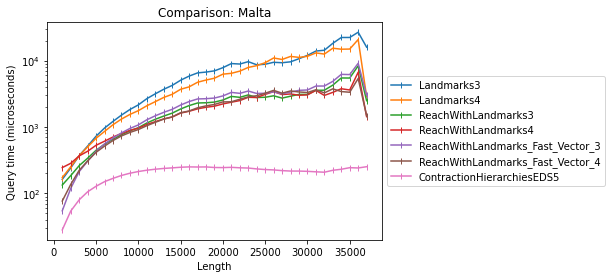

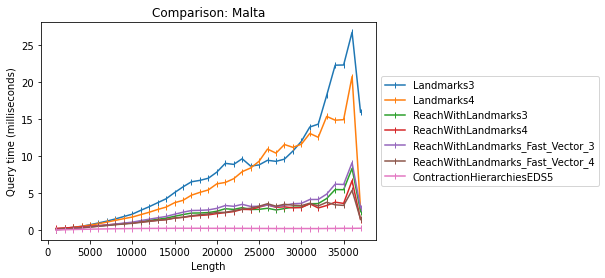

In [104]:
# Combined
for elem in malta_length_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks3":
    #    continue
    #if elem[2] == "Landmarks4":
    #    continue
    plt.plot(elem[0], elem[1], label = elem[2], marker='|')

    
plt.yscale('log')
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Length')
plt.ylabel('Query time (microseconds)')
plt.title('Comparison: Malta')
# show
plt.show()

for elem in malta_length_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks3":
    #    continue
    #if elem[2] == "Landmarks4":
    #    continue
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')

    
    
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Length')
plt.ylabel('Query time (milliseconds)')

plt.title('Comparison: Malta')
# show
plt.show()

rows_countet: 
3204
Average length: 
26000.475031210986
Landmarks3
Landmarks4
ReachWithAStar
ReachWithLandmarks3
ReachWithLandmarks4
ReachWithLandmarks_Fast_Vector_3
ReachWithLandmarks_Fast_Vector_4
ContractionHierarchiesEDS5


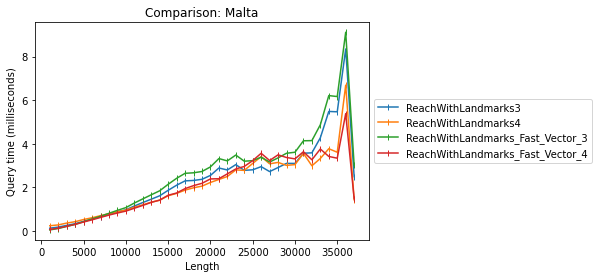

In [105]:


rows = path_lengths
rows = sorted(rows[1:], key=lambda x: int(x))


total_length = 0
rows_countet = 0
for row in path_lengths[1:]:
    if row != "2147483647":
        length = int(row)
        if length > 22098:
            total_length += int(row)
            rows_countet += 1
            

print("rows_countet: ")
print(rows_countet)

print("Average length: ")
print(total_length/rows_countet)

for elem in malta_length_times:
    print(elem[2])
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks4":
    #    continue
    #if elem[2] == "ReachWithLandmarks_Fast_Vector_3":
    #    continue
    #if elem[2] == "ReachWithLandmarks_Fast_Vector_4":
    #    continue
    if elem[2] == "ContractionHierarchiesEDS5":
        continue
    if elem[2] == "Landmarks3":
        continue
    if elem[2] == "Landmarks4":
        continue
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')

    
    
    
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Length')
plt.ylabel('Query time (milliseconds)')

plt.title('Comparison: Malta')
# show
plt.show()

In [ ]:
for elem in malta_rank_times:
    if elem[2] == "ReachWithAStar":
        continue
    #if elem[2] == "ReachWithLandmarks":
    #    continue
    #if elem[2] == "ContractionHierarchiesEDS5":
    #    continue
    #if elem[2] == "Landmarks":
    #    continue
    if elem[2] == "Dijkstra":
        continue
    if elem[2] == "AStar":
        continue
    if elem[2] == "BidirectionalAStar":
        continue
    if elem[2] == "BidirectionalLandmarks":
        continue
    if elem[2] == "BidirectionalDijkstra":
        continue
    plt.plot(elem[0], [x/1000 for x in elem[1]], label = elem[2], marker='|')
